In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [10]:
application_train = pd.read_csv("home-credit-default-risk/application_train.csv")
application_test = pd.read_csv("home-credit-default-risk/application_test.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print application_train.info()
describe = application_train.describe()
for col in describe.columns:
    print describe[col]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%   

In [27]:
# 训练集样本非常不平衡
print application_train[application_train["TARGET"] == 1].shape[0]
print application_train[application_train["TARGET"] == 0].shape[0]

24825
282686


In [42]:
application_train_cat = application_train.loc[:, application_train.dtypes == "object"]
application_train_cat["TARGET"] = application_train["TARGET"]
for col in application_train_cat.columns:
    print col
    print application_train_cat[col].unique()
    print application_train_cat[application_train_cat[col].isnull()].shape[0]

/Users/zhoujunwen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
0
CODE_GENDER
['M' 'F' 'XNA']
0
FLAG_OWN_CAR
['N' 'Y']
0
FLAG_OWN_REALTY
['Y' 'N']
0
NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
1292
NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
0
NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
0
NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
0
NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
0
OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff

In [60]:
none_static = application_train.isnull().sum()
for idx in none_static[none_static > 0].index:
    print idx + ":" + str(none_static[none_static > 0][idx])

AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE:1292
OWN_CAR_AGE:202929
OCCUPATION_TYPE:96391
CNT_FAM_MEMBERS:2
EXT_SOURCE_1:173378
EXT_SOURCE_2:660
EXT_SOURCE_3:60965
APARTMENTS_AVG:156061
BASEMENTAREA_AVG:179943
YEARS_BEGINEXPLUATATION_AVG:150007
YEARS_BUILD_AVG:204488
COMMONAREA_AVG:214865
ELEVATORS_AVG:163891
ENTRANCES_AVG:154828
FLOORSMAX_AVG:153020
FLOORSMIN_AVG:208642
LANDAREA_AVG:182590
LIVINGAPARTMENTS_AVG:210199
LIVINGAREA_AVG:154350
NONLIVINGAPARTMENTS_AVG:213514
NONLIVINGAREA_AVG:169682
APARTMENTS_MODE:156061
BASEMENTAREA_MODE:179943
YEARS_BEGINEXPLUATATION_MODE:150007
YEARS_BUILD_MODE:204488
COMMONAREA_MODE:214865
ELEVATORS_MODE:163891
ENTRANCES_MODE:154828
FLOORSMAX_MODE:153020
FLOORSMIN_MODE:208642
LANDAREA_MODE:182590
LIVINGAPARTMENTS_MODE:210199
LIVINGAREA_MODE:154350
NONLIVINGAPARTMENTS_MODE:213514
NONLIVINGAREA_MODE:169682
APARTMENTS_MEDI:156061
BASEMENTAREA_MEDI:179943
YEARS_BEGINEXPLUATATION_MEDI:150007
YEARS_BUILD_MEDI:204488
COMMONAREA_MEDI:214865
ELEVATORS_ME

In [105]:
# AMT_ANNUITY空值处理办法：用其余所有人的 AMT_CREDIT／AMT_ANNUITY 的均值近似为这些用户需要还的期数，用 AMT_CREDIT 除以这个值
print "-----AMT_ANNUITY-----"
print application_train[application_train["AMT_ANNUITY"].isnull()][["TARGET", "AMT_CREDIT"]]
statc_tmp = pd.DataFrame(application_train["AMT_CREDIT"] / application_train["AMT_ANNUITY"])
print statc_tmp.describe()
# AMT_GOODS_PRICE空值处理办法：用AMT_CREDIT列代替
# NAME_TYPE_SUITE空值处理办法：用Unaccompanied填充
print "-----NAME_TYPE_SUITE-----"
print application_train["NAME_TYPE_SUITE"].unique()
print application_train[["NAME_TYPE_SUITE", "TARGET"]].groupby(["NAME_TYPE_SUITE"]).count()
# OWN_CAR_AGE空值处理办法：空值里有两个记录是有车的，其余均没车, 空值记录里填-1（为了训练集和测试集同步，而且测试集不会少数据）
print "-----OWN_CAR_AGE-----"
print application_train[~application_train["OWN_CAR_AGE"].isnull()][["FLAG_OWN_CAR"]].describe()
print application_train[application_train["OWN_CAR_AGE"].isnull()][["FLAG_OWN_CAR"]].describe()
print application_train[["OWN_CAR_AGE"]].describe()
# OCCUPATION_TYPE空值处理办法: 作为另外一种职业传入，无职业者的欠款率明显低于平均水平，而且收入分布于整体的收入分布类似
print "-----OCCUPATION_TYPE-----"
print application_train["OCCUPATION_TYPE"].unique()
occ_null = application_train[application_train["OCCUPATION_TYPE"].isnull()][["TARGET"]]
occ = application_train[~application_train["OCCUPATION_TYPE"].isnull()][["TARGET"]]
print occ_null[occ_null["TARGET"] == 1].shape[0] * 1.0 / occ_null.shape[0]
print occ[occ["TARGET"] == 1].shape[0] * 1.0 / occ.shape[0]
print application_train[application_train["TARGET"] == 1].shape[0] * 1.0 / application_train.shape[0]
print application_train[application_train["OCCUPATION_TYPE"].isnull()][["AMT_INCOME_TOTAL"]].describe()
print application_train[["AMT_INCOME_TOTAL"]].describe()
# CNT_FAM_MEMBERS空值处理办法：就用2个吧，用众数吧
print "-----CNT_FAM_MEMBERS-----"
print application_train[["CNT_FAM_MEMBERS"]].describe()
# EXT_SOURCE_1，EXT_SOURCE_2，EXT_SOURCE_3空值处理办法：保留空值，因为这个字段有区分能力，但是含义不直接，不好直接填均值或0，
# 必须填kong时使用均值
# APARTMENTS_AVG空值处理办法：因为这个记录的是客户居住地的信息，和客户是否有房子没关系，猜想信息太细大部分客户无法提供
# 所以对这类字段，AVG后缀的字段用非空值的均值填充，MODE后缀的字段用非空值的众数填充，MIDI后缀的字段用中位数填充
print "-----APARTMENTS_AVG-----"
apartment_names = ["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG","ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE","APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE","TOTALAREA_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]
data_tmp = application_train[application_train["YEARS_BEGINEXPLUATATION_AVG"].isnull()][apartment_names].describe()
for col in data_tmp.columns:
    print col + " : " + str(data_tmp.loc["count", col])
print application_train["FLAG_OWN_REALTY"].unique()
print application_train[application_train["YEARS_BEGINEXPLUATATION_AVG"].isnull()][["FLAG_OWN_REALTY"]].describe()
print "FLAG_OWN_REALTY == Y has sampels: " + str(application_train[application_train["FLAG_OWN_REALTY"] == 'Y'].shape[0]) 
print application_train[application_train["FLAG_OWN_REALTY"] == 'N'][apartment_names].describe()
# OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE空值处理办法：
# 全部填0，因为这几个字段以0居多（至少超过50%以上），而且空值样本数量有限
print "-----OBS_30_CNT_SOCIAL_CIRCLE-----"
print application_train[application_train["OBS_30_CNT_SOCIAL_CIRCLE"].isnull()][["OBS_30_CNT_SOCIAL_CIRCLE", 
                                                                                 "DEF_30_CNT_SOCIAL_CIRCLE",
                                                                                 "OBS_60_CNT_SOCIAL_CIRCLE", 
                                                                                 "DEF_60_CNT_SOCIAL_CIRCLE"]].describe()
print application_train[application_train["DEF_60_CNT_SOCIAL_CIRCLE"].isnull()][["TARGET"]].describe()
# AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,
# AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR空值处理办法：
# 前五个字段填0，最后一个字段用均值
print "-----AMT_REQ_CREDIT_BUREAU_YEAR-----"
print application_train[application_train["AMT_REQ_CREDIT_BUREAU_HOUR"] == 0].shape[0] * 1.0 / application_train[~application_train["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull()].shape[0]
print application_train[application_train["AMT_REQ_CREDIT_BUREAU_DAY"] == 0].shape[0] * 1.0 / application_train[~application_train["AMT_REQ_CREDIT_BUREAU_DAY"].isnull()].shape[0]
print application_train[application_train["AMT_REQ_CREDIT_BUREAU_WEEK"] == 0].shape[0] * 1.0 / application_train[~application_train["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull()].shape[0]
print application_train[application_train["AMT_REQ_CREDIT_BUREAU_MON"] == 0].shape[0] * 1.0 / application_train[~application_train["AMT_REQ_CREDIT_BUREAU_MON"].isnull()].shape[0]
print application_train[application_train["AMT_REQ_CREDIT_BUREAU_QRT"] == 0].shape[0] * 1.0 / application_train[~application_train["AMT_REQ_CREDIT_BUREAU_QRT"].isnull()].shape[0]
print application_train[application_train["AMT_REQ_CREDIT_BUREAU_YEAR"] == 0].shape[0] * 1.0 / application_train[~application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull()].shape[0]


-----AMT_ANNUITY-----
        TARGET  AMT_CREDIT
47531        0    450000.0
50035        0    450000.0
51594        0    539100.0
55025        0    296280.0
59934        0    360000.0
75873        0    219249.0
89343        0    157500.0
123872       0    929088.0
207186       0    486000.0
227939       0    628069.5
239329       0    792000.0
241835       0   1483231.5
                   0
count  307499.000000
mean       21.612322
std         7.823823
min         8.036674
25%        15.614496
50%        20.000000
75%        27.099985
max        45.305079
-----NAME_TYPE_SUITE-----
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
                 TARGET
NAME_TYPE_SUITE        
Children           3267
Family            40149
Group of people     271
Other_A             866
Other_B            1770
Spouse, partner   11370
Unaccompanied    248526
-----OWN_CAR_AGE-----
       FLAG_OWN_CAR
count        104582
unique            1
top            

0.993887034197
0.994402087281
0.967908809287
0.83548753346
0.809862702638
0.269936689825


In [44]:
bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
bureau.head(20)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [46]:
print bureau.info()
bureau.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [48]:
bureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
bureau_balance.head(20)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [49]:
POS_CASH_balance = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")
POS_CASH_balance.head(20)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [128]:
unnull_part = application_train[~application_train["CNT_FAM_MEMBERS"].isnull()].copy()
null_part = application_train[application_train["CNT_FAM_MEMBERS"].isnull()].copy()
unnull_part[["CNT_FAM_MEMBERS"]].mean()
# null_part["CNT_FAM_MEMBERS"] = unnull_part[["CNT_FAM_MEMBERS"]].mode().loc[0]
# null_part["CNT_FAM_MEMBERS"]

2.152665450442101

In [134]:
avg_names = ["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG",
                 "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG",
                 "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG",
                 "NONLIVINGAREA_AVG"]
application_train[avg_names].median()[]

APARTMENTS_AVG                 0.0876
BASEMENTAREA_AVG               0.0763
YEARS_BEGINEXPLUATATION_AVG    0.9816
YEARS_BUILD_AVG                0.7552
COMMONAREA_AVG                 0.0211
ELEVATORS_AVG                  0.0000
ENTRANCES_AVG                  0.1379
FLOORSMAX_AVG                  0.1667
FLOORSMIN_AVG                  0.2083
LANDAREA_AVG                   0.0481
LIVINGAPARTMENTS_AVG           0.0756
LIVINGAREA_AVG                 0.0745
NONLIVINGAPARTMENTS_AVG        0.0000
NONLIVINGAREA_AVG              0.0036
dtype: float64

In [143]:
print application_train["NAME_CONTRACT_TYPE"].unique()
np.argwhere(application_train["NAME_CONTRACT_TYPE"].unique() == "Cash loans")[0][0]

['Cash loans' 'Revolving loans']


0

In [150]:
tmp = application_train[["OCCUPATION_TYPE", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].groupby(
        ["OCCUPATION_TYPE"]).median()
tmp.columns = ["INCOME_OCCUPATION_MEDI", "CREDIT_OCCUPATION_MEDI", "ANNUITY_OCCUPATION_MEDI",
                   "GOOD_PRICE_OCCUPATION_MEDI"]
tmp = application_train.join(tmp, on=["OCCUPATION_TYPE"], how="left")

In [151]:
tmp

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_OCCUPATION_MEDI,CREDIT_OCCUPATION_MEDI,ANNUITY_OCCUPATION_MEDI,GOOD_PRICE_OCCUPATION_MEDI
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,157500.0,495000.0,24930.0,450000.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,157500.0,526491.0,25506.0,454500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,157500.0,495000.0,24930.0,450000.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,157500.0,495000.0,24930.0,450000.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,157500.0,526491.0,25506.0,454500.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0.0,0.0,0.0,0.0,1.0,1.0,157500.0,495000.0,24930.0,450000.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0.0,0.0,0.0,1.0,1.0,2.0,178650.0,604152.0,28570.5,540000.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,225000.0,675000.0,32017.5,675000.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,157500.0,495000.0,24930.0,450000.0


In [154]:
a = np.array([1,2,3])
b = np.array([2,3,4])
a - b

array([-1, -1, -1])

In [173]:
application_train[["REGION_RATING_CLIENT_W_CITY", "OCCUPATION_TYPE", "TARGET"]].groupby(["REGION_RATING_CLIENT_W_CITY", "OCCUPATION_TYPE"]).count()

TARGET
REGION_RATING_CLIENT_W_CITY OCCUPATION_TYPE              
1                           Accountants              1395
                            Cleaning staff            573
                            Cooking staff             471
                            Core staff               3374
                            Drivers                  2134
                            HR staff                   96
                            High skill tech staff    1729
                            IT staff                  109
                            Laborers                 5346
                            Low-skill Laborers        120
                            Managers                 3263
                            Medicine staff            887
                            Private service staff     418
                            Realty agents             108
                            Sales staff              2876
                            Secretaries               200
                            Security staff            614
                            Waiters/barmen staff      131
2                           Accountants              7109
                            Cleaning staff           3430
                            Cooking staff            4492
                            Core staff              20122
                            Drivers                 13954
                            HR staff                  386
                            High skill tech staff    8326
                            IT staff                  341
                            Laborers                42061
                            Low-skill Laborers       1650
                            Managers                15333
                            Medicine staff           6233
                            Private service staff    1888
                            Realty agents             537
                            Sales staff             24498
                            Secretaries               936
                            Security staff           5151
                            Waiters/barmen staff     1042
3                           Accountants              1309
                            Cleaning staff            650
                            Cooking staff             983
                            Core staff               4074
                            Drivers                  2515
                            HR staff                   81
                            High skill tech staff    1325
                            IT staff                   76
                            Laborers                 7779
                            Low-skill Laborers        323
                            Managers                 2775
                            Medicine staff           1417
                            Private service staff     346
                            Realty agents             106
                            Sales staff              4728
                            Secretaries               169
                            Security staff            956
                            Waiters/barmen staff      175

0.0344129554656
0.0810315426335


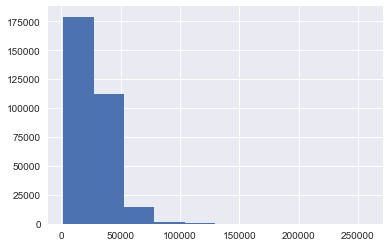

In [198]:
# 直观上来说，贷款金额越高还款的压力越大，所以还款率越低，但是从数据上来看与这个完全相反
# 可能从业务上来说，Home Credit是主打小额贷款，而且这些样本应该都是已经拿到公司贷款的样本（不然不会有label），
# 在用户正式成为Home Credit的客户的过程中应该是有筛选的，而且公司会对金额高的用户审核更严
application_train["AMT_ANNUITY"].hist()
print application_train[application_train["AMT_ANNUITY"] > 75000]["TARGET"].mean()
print application_train[application_train["AMT_ANNUITY"] < 75000]["TARGET"].mean()

0.0834591276345
0.0547832917791


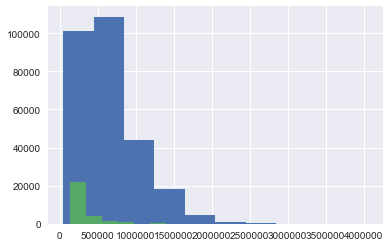

In [207]:
# 循环贷款因为其业务特性，我认为还款率要低与现金贷款的
application_train[application_train["NAME_CONTRACT_TYPE"] == "Cash loans"]["AMT_CREDIT"].hist()
application_train[application_train["NAME_CONTRACT_TYPE"] == "Revolving loans"]["AMT_CREDIT"].hist()
print application_train[application_train["NAME_CONTRACT_TYPE"] == "Cash loans"]["TARGET"].mean()
print application_train[application_train["NAME_CONTRACT_TYPE"] == "Revolving loans"]["TARGET"].mean()

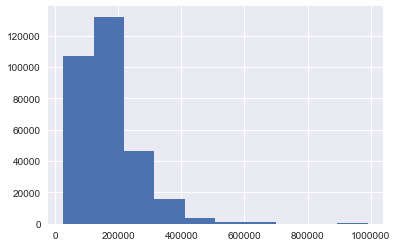

In [213]:
# AMT_INCOME_TOTAL 划分：5W，10W，15W，20W，25W，30W，35W，40W，40W以上
application_train[application_train["AMT_INCOME_TOTAL"] < 1000000]["AMT_INCOME_TOTAL"].hist()

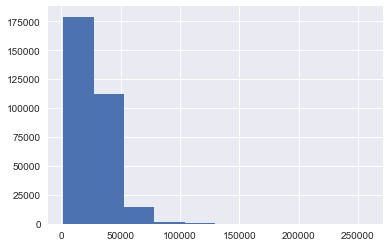

In [214]:
# AMT_ANNUITY 分段：1.25W，2.5W，3.75W，5W，6.25W，7.5W，7.5W以上
application_train["AMT_ANNUITY"].hist()

In [217]:
bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
print bureau.shape
bureau.describe()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [242]:
tmp = bureau[(bureau["CREDIT_ACTIVE"] == "Sold") & (~bureau["DAYS_CREDIT_ENDDATE"].isnull())]
print tmp[["DAYS_CREDIT_ENDDATE"]].describe()
print bureau[bureau["DAYS_CREDIT_ENDDATE"].isnull()]["CREDIT_ACTIVE"].unique()
print bureau[(~bureau["DAYS_CREDIT_ENDDATE"].isnull()) & (bureau["AMT_CREDIT_MAX_OVERDUE"] == 0.0)][["DAYS_CREDIT_ENDDATE"]].describe()
bureau[bureau["DAYS_CREDIT_ENDDATE"].isnull()]

       DAYS_CREDIT_ENDDATE
count          5901.000000
mean           -259.561091
std            2651.224141
min           -2749.000000
25%           -1728.000000
50%            -961.000000
75%             493.000000
max           31196.000000
['Active' 'Closed' 'Sold' 'Bad debt']
       DAYS_CREDIT_ENDDATE
count        423959.000000
mean            170.178380
std            3718.089119
min          -42042.000000
25%           -1016.000000
50%            -309.000000
75%             282.000000
max           31197.000000


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
17,238881,5714486,Active,currency 1,-381,0,NaN,NaN,NaN,0,450000.00,520920.00,NaN,0.0,Consumer credit,-4,NaN
20,238881,5714489,Active,currency 1,-392,0,NaN,NaN,0.000,0,252000.00,23679.00,228320.100,0.0,Credit card,-22,NaN
32,136226,5714503,Closed,currency 1,-559,0,NaN,-355.0,0.000,0,110250.00,0.00,0.000,0.0,Credit card,-351,NaN
43,435112,5714518,Active,currency 1,-1483,0,NaN,NaN,NaN,0,200250.00,0.00,NaN,0.0,Credit card,-848,NaN
75,303740,5714554,Active,currency 1,-581,0,NaN,NaN,0.000,0,384750.00,263056.50,121690.170,0.0,Credit card,-22,NaN
97,119939,5714580,Active,currency 1,-2401,0,NaN,NaN,0.000,0,99000.00,45036.00,53962.695,0.0,Credit card,-22,NaN
108,419892,5714596,Active,currency 1,-381,0,NaN,NaN,NaN,0,2767500.00,2739622.50,NaN,0.0,Mortgage,-27,NaN
136,338464,5714634,Active,currency 1,-140,0,NaN,NaN,0.000,0,144000.00,143019.00,980.280,0.0,Credit card,-22,NaN
148,444864,5714647,Active,currency 1,-286,0,NaN,NaN,0.000,0,364500.00,0.00,364500.000,0.0,Credit card,-29,NaN


In [244]:
print bureau["CREDIT_CURRENCY"].unique()
print bureau["CREDIT_ACTIVE"].unique()

['currency 1' 'currency 2' 'currency 4' 'currency 3']
['Closed' 'Active' 'Sold' 'Bad debt']


In [248]:
result = 0
for id in bureau["SK_ID_CURR"].unique():
    tmp = bureau[bureau["SK_ID_CURR"] == id].copy()
    if len(tmp["CREDIT_CURRENCY"].unique()) > 1:
       result += 1
result

1072

In [255]:
print bureau[bureau["CREDIT_DAY_OVERDUE"] > 0].shape
print bureau[bureau["AMT_CREDIT_MAX_OVERDUE"] > 0].shape
print bureau[bureau["AMT_CREDIT_SUM"] == 0].shape
tmp = bureau[["AMT_CREDIT_SUM", "AMT_CREDIT_MAX_OVERDUE"]].copy()
tmp["CREDIT_MINUS_OVERDUE"] = tmp["AMT_CREDIT_SUM"] - tmp["AMT_CREDIT_MAX_OVERDUE"]
print tmp.describe()
bureau[(bureau["AMT_CREDIT_SUM"] - bureau["AMT_CREDIT_MAX_OVERDUE"]) < 0]

(4217, 17)
(121290, 17)
(66582, 17)
       AMT_CREDIT_SUM  AMT_CREDIT_MAX_OVERDUE  CREDIT_MINUS_OVERDUE
count    1.716415e+06            5.919400e+05          5.919400e+05
mean     3.549946e+05            3.825418e+03          2.873304e+05
std      1.149811e+06            2.060316e+05          8.286562e+05
min      0.000000e+00            0.000000e+00         -1.006872e+08
25%      5.130000e+04            0.000000e+00          4.351629e+04
50%      1.255185e+05            0.000000e+00          9.805500e+04
75%      3.150000e+05            0.000000e+00          2.250000e+05
max      5.850000e+08            1.159872e+08          1.422900e+08


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
521,122858,5715142,Closed,currency 1,-895,0,NaN,-353.0,8696.520,0,0.000,0.000,0.000,0.00,Credit card,-287,NaN
567,417740,5715198,Closed,currency 1,-2711,0,NaN,-873.0,4752.000,0,0.000,0.000,0.000,0.00,Credit card,-828,NaN
1072,370938,5715797,Active,currency 1,-802,0,NaN,NaN,450.000,0,4.500,0.000,4.500,0.00,Credit card,-21,3390.66
1302,299829,5716062,Closed,currency 1,-828,0,10129.0,-430.0,28246.500,0,0.000,NaN,NaN,0.00,Credit card,-430,NaN
1306,299700,5716067,Active,currency 1,-2252,0,8752.0,NaN,468.000,1,0.000,NaN,NaN,0.00,Credit card,-930,NaN
1854,261265,5716749,Closed,currency 1,-799,0,NaN,-472.0,15458.580,0,0.000,0.000,0.000,0.00,Credit card,-351,NaN
1905,132005,5716815,Active,currency 1,-2073,0,8886.0,NaN,117.000,1,0.000,NaN,NaN,0.00,Credit card,-378,NaN
2028,430220,5716984,Closed,currency 1,-2509,0,NaN,-1407.0,3226.500,0,0.000,0.000,0.000,0.00,Credit card,-1199,NaN
2124,347464,5717100,Closed,currency 1,-1968,0,8991.0,-1239.0,91696.500,1,0.000,NaN,NaN,0.00,Credit card,-1239,NaN
2196,178283,5717190,Active,currency 1,-1492,1201,-1127.0,NaN,349428.060,0,0.000,0.000,0.000,349428.06,Credit card,-47,NaN


In [256]:
application_test = pd.read_csv("home-credit-default-risk/application_test.csv")
application_test.shape

(48744, 121)

In [259]:
print bureau["CREDIT_TYPE"].unique()
print application_train["NAME_CONTRACT_TYPE"].unique()

['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
['Cash loans' 'Revolving loans']


In [2]:
bureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [3]:
bureau_balance.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [4]:
tmp = pd.read_csv("home-credit-default-risk-preprocess/bureau_preprocess.csv")
tmp.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_DAY_OVERDUE_SUM,AMT_CREDIT_MAX_OVERDUE_SUM,...,DAYS_DIFF_MEDIAN,DAYS_DIFF_SUM,DAYS_CREDIT_ENDDATE_NEG_RATIO,DAYS_ENDDATE_DIFF_MAX,DAYS_ENDDATE_DIFF_MIN,DAYS_ENDDATE_DIFF_MEAN,DAYS_ENDDATE_DIFF_STD,DAYS_ENDDATE_DIFF_MEDIAN,DAYS_ENDDATE_DIFF_SUM,DEBT_CREDIT_RATIO
0,0.428571,0.0,0.571429,0.0,7,0,0,0,0,0.000,...,239.0,1523,0.428571,876.0,0.0,455.666667,439.067573,491.0,1367.0,0.410555
1,0.250000,0.0,0.750000,0.0,8,0,0,0,0,8405.145,...,123.5,1334,0.625000,695.0,0.0,239.333333,394.786440,23.0,718.0,0.284122
2,0.250000,0.0,0.750000,0.0,4,0,0,0,0,0.000,...,515.0,1980,0.250000,0.0,0.0,0.000000,NaN,0.0,0.0,0.000000
3,0.000000,0.0,1.000000,0.0,2,0,0,0,0,0.000,...,459.0,918,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,0.666667,0.0,0.333333,0.0,3,0,0,0,0,0.000,...,75.0,311,0.666667,1202.0,0.0,601.000000,849.942351,601.0,1202.0,0.864992


In [7]:
tmp["OVERDUE_DEBT_RATIO"] = tmp["AMT_CREDIT_SUM_OVERDUE_SUM"] * 1.0 / tmp["AMT_CREDIT_SUM_DEBT_SUM"]

In [8]:
tmp.to_csv("home-credit-default-risk-preprocess/bureau_preprocess.csv", index=None)

In [10]:
b_pre = pd.read_csv("home-credit-default-risk-preprocess/bureau_preprocess.csv")
for column in b_pre.columns:
    print b_pre[column].describe()

count    305811.000000
mean          0.375750
std           0.316265
min           0.000000
25%           0.117293
50%           0.333333
75%           0.535714
max           1.000000
Name: CREDIT_ACTIVE_Active, dtype: float64
count    305811.000000
mean          0.000014
std           0.002372
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CREDIT_ACTIVE_Bad debt, dtype: float64
count    305811.000000
mean          0.620196
std           0.316732
min           0.000000
25%           0.454545
50%           0.666667
75%           0.876344
max           1.000000
Name: CREDIT_ACTIVE_Closed, dtype: float64
count    305811.000000
mean          0.004040
std           0.040032
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CREDIT_ACTIVE_Sold, dtype: float64
count    305811.000000
mean         82.042922
std         146.383659
min           0.000000


Name: AMT_CREDIT_SUM_DEBT_STD, dtype: float64
count    2.974390e+05
mean     7.924816e+04
std      5.003887e+05
min     -1.083615e+06
25%      0.000000e+00
50%      0.000000e+00
75%      8.374500e+03
max      5.175000e+07
Name: AMT_CREDIT_SUM_DEBT_MEDIAN, dtype: float64
count    2.974390e+05
mean     6.270839e+06
std      3.487000e+07
min     -5.633686e+07
25%      0.000000e+00
50%      3.556080e+05
75%      2.532445e+06
max      1.186614e+10
Name: AMT_CREDIT_SUM_DEBT_SUM, dtype: float64
count    2.805030e+05
mean     2.188811e+04
std      8.454536e+04
min     -1.747035e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT_MAX, dtype: float64
count    2.805030e+05
mean     1.117188e+03
std      2.065156e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.500000e+06
Name: AMT_CREDIT_SUM_LIMIT_MIN, dtype: float64
count    2.805030e+05
mean     5.722298e+03
std      3.010888

In [2]:
pos_cash_balance = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")
credit_card_balance = pd.read_csv("home-credit-default-risk/credit_card_balance.csv")
previous_application = pd.read_csv("home-credit-default-risk/previous_application.csv")

In [13]:
print pos_cash_balance.head()
print pos_cash_balance.columns
print pos_cash_balance.describe()

   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  
Index([u'SK_ID_PREV', u'SK_ID_CURR', u'MONTHS_BALANCE', u'CNT_INSTALMENT',
       u'CNT_INSTALMENT_FUTURE', u'NAME_CONTRACT_STATUS', u'SK_DPD',
       u'SK_DPD_DEF'],
      dtype='object')
         SK_ID_PREV    SK_ID_CURR  M

In [19]:
# 三个文件的SK_ID_PREV会不会重复呢
tmp1 = set(pos_cash_balance["SK_ID_PREV"].unique())
tmp2 = set(credit_card_balance["SK_ID_PREV"].unique())
tmp3 = set(previous_application["SK_ID_PREV"].unique())
print len(tmp1)
print len(tmp2)
print len(tmp3)

936325
104307
1670214
set([])


In [21]:
print len(tmp1 & tmp2)
print len(tmp1 & tmp3)
print len(tmp2 & tmp3)

0
898903
92935


In [26]:
# 看看哪些样本pos_cash_balance和previous_application匹配不上
pos_tmp = pos_cash_balance[["SK_ID_PREV", "SK_ID_CURR"]].copy()
pre_tmp = previous_application[["SK_ID_PREV", "SK_ID_CURR"]].copy()
pos_tmp = pos_tmp.merge(pre_tmp, on="SK_ID_PREV", how="left", suffixes=["", "_right"])
unmatch_id = pos_tmp[pos_tmp["SK_ID_CURR_right"].isnull()]["SK_ID_CURR"].unique()
print len(unmatch_id)
print unmatch_id

33530
[172682 210070 438587 ... 199658 240630 338704]


In [27]:
previous_application = pd.read_csv("home-credit-default-risk/previous_application.csv")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for column in previous_application.columns:
    print previous_application[[column]].head()

   SK_ID_PREV
0     2030495
1     2802425
2     2523466
3     2819243
4     1784265
   SK_ID_CURR
0      271877
1      108129
2      122040
3      176158
4      202054
  NAME_CONTRACT_TYPE
0     Consumer loans
1         Cash loans
2         Cash loans
3         Cash loans
4         Cash loans
   AMT_ANNUITY
0     1730.430
1    25188.615
2    15060.735
3    47041.335
4    31924.395
   AMT_APPLICATION
0          17145.0
1         607500.0
2         112500.0
3         450000.0
4         337500.0
   AMT_CREDIT
0     17145.0
1    679671.0
2    136444.5
3    470790.0
4    404055.0
   AMT_DOWN_PAYMENT
0               0.0
1               NaN
2               NaN
3               NaN
4               NaN
   AMT_GOODS_PRICE
0          17145.0
1         607500.0
2         112500.0
3         450000.0
4         337500.0
  WEEKDAY_APPR_PROCESS_START
0                   SATURDAY
1                   THURSDAY
2                    TUESDAY
3                     MONDAY
4                   THURSDAY
   HOUR_AP

In [32]:
print previous_application.shape
previous_application[["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"]].isnull().sum()

(1670214, 37)


RATE_INTEREST_PRIMARY       1664263
RATE_INTEREST_PRIVILEGED    1664263
dtype: int64

In [33]:
pos_cash_balance["NAME_CONTRACT_STATUS"].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [ ]:
lst = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NAME_CASH_LOAN_PURPOSE",
                      "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_TYPE_SUITE", "NAME_CLIENT_TYPE",
                      "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY",
                      "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]

In [4]:
lst = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NAME_CASH_LOAN_PURPOSE",
                      "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_TYPE_SUITE", "NAME_CLIENT_TYPE",
                      "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY",
                      "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]
for name in lst:
   print previous_application[name].unique()

['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
['Y' 'N']
['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
['Approved' 'Refused' 'Canceled' 'Unused offer']
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
[nan 'Unaccompanied' 'Spouse, partner' 'Family' 'Children' 'Other_B'
 'Other_A' 'Group of people']
['Repeater' 'New' 'Refreshed' 'XNA']
['Mobile' 'XNA' 'Consumer Electr

In [8]:
previous_application["SK_ID_CURR"].quantile([0.1, 0.2]).values

135738.0

In [11]:
current_application = application_train.append(application_test)

In [79]:
print len(current_application["SK_ID_CURR"].unique())
print len(previous_application["SK_ID_CURR"].unique())
print current_application.shape
print pd.merge(current_application[["SK_ID_CURR"]], previous_application[["SK_ID_CURR"]], left_on=["SK_ID_CURR"], right_on=["SK_ID_CURR"], how="inner").shape
print pd.merge(current_application[["SK_ID_CURR"]], previous_application[["SK_ID_PREV"]], left_on=["SK_ID_CURR"], right_on=["SK_ID_PREV"], how="inner").shape

356255
338857
(356255, 122)
(1670214, 1)
(0, 2)


In [51]:
join_tmp = current_application[["SK_ID_CURR"]].join(previous_application[["SK_ID_CURR"]],
                                                    on=["SK_ID_CURR"], how="inner", rsuffix="_x")
join_tmp["flag"] = (join_tmp["SK_ID_CURR"] == join_tmp["SK_ID_CURR_x"])
join_tmp[join_tmp["flag"] == False].shape

(356254, 3)

In [57]:
join_tmp.head()
join_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 3 columns):
SK_ID_CURR      356255 non-null int64
SK_ID_CURR_x    356255 non-null int64
flag            356255 non-null bool
dtypes: bool(1), int64(2)
memory usage: 8.5 MB


In [85]:
tmp1 = current_application[["SK_ID_CURR", "AMT_GOODS_PRICE"]].copy()
tmp1["SK_ID_CURR"] = tmp1["SK_ID_CURR"].apply(lambda x: str(x))
tmp2 = previous_application[["SK_ID_CURR", "AMT_CREDIT"]].copy()
tmp2["SK_ID_CURR"] = tmp2["SK_ID_CURR"].apply(lambda x: str(x))
merge = pd.merge(tmp1, tmp2, left_on="SK_ID_CURR", right_on="SK_ID_CURR", how="inner")
print merge.head()
print merge.shape
# print len(set(tmp1["SK_ID_CURR"].values) & set(tmp2["SK_ID_CURR"].values))

  SK_ID_CURR  AMT_GOODS_PRICE  AMT_CREDIT
0     100002         351000.0    179055.0
1     100003        1129500.0   1035882.0
2     100003        1129500.0    348637.5
3     100003        1129500.0     68053.5
4     100004         135000.0     20106.0
(1670214, 3)


In [109]:
def helper(tmp):
    print tmp["CODE_REJECT_REASON"].unique()
    print tmp[["SK_ID_PREV", "CODE_REJECT_REASON"]].groupby(["CODE_REJECT_REASON"]).count()
print previous_application["CODE_REJECT_REASON"].unique()
print previous_application["NAME_CONTRACT_STATUS"].unique()
print pos_cash_balance["NAME_CONTRACT_STATUS"].unique()
print credit_card_balance["NAME_CONTRACT_STATUS"].unique()
print "Approved"
tmp = previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]
helper(tmp)
print "Refused"
tmp = previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]
helper(tmp)
print "Canceled"
tmp = previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Canceled"]
helper(tmp)
print "Unused offer"
tmp = previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]
helper(tmp)

['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
['Approved' 'Refused' 'Canceled' 'Unused offer']
['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store' 'Demand'
 'Canceled' 'XNA' 'Amortized debt']
['Active' 'Completed' 'Demand' 'Signed' 'Sent proposal' 'Refused'
 'Approved']
Approved
['XAP' 'XNA']
                    SK_ID_PREV
CODE_REJECT_REASON            
XAP                    1036773
XNA                          8
Refused
['HC' 'LIMIT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM' 'XAP']
                    SK_ID_PREV
CODE_REJECT_REASON            
HC                      175231
LIMIT                    55680
SCO                      37467
SCOFR                    12811
SYSTEM                     717
VERIF                     3535
XAP                          1
XNA                       5236
Canceled
['XAP']
                    SK_ID_PREV
CODE_REJECT_REASON            
XAP                     316319
Unused offer
['CLIENT']
                    SK_ID_PREV
CODE_R

In [98]:
print len(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["SK_ID_CURR"].unique())
print len(previous_application[previous_application["NAME_CONTRACT_STATUS"] != "Unused offer"]["SK_ID_CURR"].unique())
print len(previous_application["SK_ID_CURR"].unique())

22079
338682
338857


In [108]:
print previous_application["NAME_CONTRACT_TYPE"].unique()
print len(set(previous_application[previous_application["NAME_CONTRACT_TYPE"] == "Consumer loans"]["SK_ID_PREV"]) & 
         set(pos_cash_balance["SK_ID_PREV"].unique()))

['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
610380


In [111]:
print previous_application[["RATE_INTEREST_PRIVILEGED"]].describe()

       RATE_INTEREST_PRIVILEGED
count               5951.000000
mean                   0.773503
std                    0.100879
min                    0.373150
25%                    0.715645
50%                    0.835095
75%                    0.852537
max                    1.000000


In [114]:
previous_application["DOWN_PAYMENT_MINUS_ANNUITY"] = previous_application["AMT_DOWN_PAYMENT"] - previous_application["AMT_ANNUITY"]
print previous_application[["DOWN_PAYMENT_MINUS_ANNUITY"]].describe()
print previous_application[["AMT_DOWN_PAYMENT"]].describe()

       DOWN_PAYMENT_MINUS_ANNUITY
count                7.409810e+05
mean                -3.466101e+03
std                  2.073304e+04
min                 -2.243430e+05
25%                 -9.344205e+03
50%                 -3.499830e+03
75%                 -7.582500e+01
max                  3.021317e+06
       AMT_DOWN_PAYMENT
count      7.743700e+05
mean       6.697402e+03
std        2.092150e+04
min       -9.000000e-01
25%        0.000000e+00
50%        1.638000e+03
75%        7.740000e+03
max        3.060045e+06


In [122]:
print previous_application[previous_application["DAYS_TERMINATION"] < 0][["DAYS_TERMINATION"]].describe()
print previous_application[previous_application["DAYS_TERMINATION"].isnull()]["NAME_CONTRACT_STATUS"].unique()

       DAYS_TERMINATION
count     771236.000000
mean        -978.375222
std          749.134297
min        -2874.000000
25%        -1539.000000
50%         -780.000000
75%         -337.000000
max           -2.000000
['Refused' 'Canceled' 'Approved' 'Unused offer']
